In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import seaborn as sns
from ExplainableMaximumLikelihoodCalculator import ExplainableMaximumLikelihoodCalculator
import pysam
from Bio import SeqIO, Seq, SeqRecord, pairwise2
from Bio.pairwise2 import format_alignment
from LoadDataUtils import getListOfReadsFromBamFile, getListOfReadsFromFastaFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import shap
from scipy.stats import chisquare
from scipy.special import rel_entr
fileNameSapiens =  "data/simulatedData/human_chinese_AF346973_500samples.fas" #File that contains 500 reads from homo sapiens
fileNameNeanderthals =  "data/simulatedData/Neanderthal_Goyet_KX198085_500samples.fas" #File that contains 500 reads from neanderthal
fileNameDenisovans =  "data/simulatedData/denisova_kx663333_500samples.fas" #File that contains 500 reads from denisovan
neanderthals_500_generated = getListOfReadsFromFastaFile(fileNameNeanderthals)
sapiens_500_generated = getListOfReadsFromFastaFile(fileNameSapiens)
denisovan_500_samples = getListOfReadsFromFastaFile(fileNameDenisovans)
path_to_frequencies_table = "data/substitution_matrix.tsv"
import itertools
 
def findsubsets(s, n):
    subsets = list(itertools.combinations(s, n))
    return [list(a) for a in subsets]

2023-08-17 17:16:48.929822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 17:16:49.447975: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-17 17:16:49.543025: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-17 17:16:51.139760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
sapiens_reference_file_names = [
                    "data/reference_files/human_AF346981_French.fa",
                     "data/reference_files/human_AY195760_Korea.fa",
                      "data/reference_files/human_AY882416_Ethiopia.fa",
                      "data/reference_files/human_AY963586_Italian.fa",
                      "data/reference_files/human_AY195781_Caucasian.fa",
                      "data/reference_files/human_AY195757_Iraqi-Israeli.fa",
                      "data/reference_files/human_AY195749_NativeAmerican.fa"]
neanderthals_reference_file_names = [
                            "data/reference_files/neanderthal_mezmaiskaya1_FM865411.fa",
                           "data/reference_files/Neanderthal_Altai_KC879692.fa",
                           "data/reference_files/Neanderthal_Denisova11_full_mtDNA_KU131206.fa",
                           "data/reference_files/Neanderthal_Spy_94a_MG025538.fa",
                            "data/reference_files/Neanderthal_Vindija33.16_AM948965.fa",
                            "data/reference_files/Neanderthal_Vindija33.19_KJ533545.fa"]
denisovan_reference_file_names = [  
                        "data/reference_files/Denisova_MT576653.1.fa",
                        "data/reference_files/Denisova_MT576652.1.fa",
                        "data/reference_files/Denisova_4_FR695060.fa",
                        "data/reference_files/Denisova_8_KT780370.fa",
                        "data/reference_files/Denisova_manual_phalanx_NC_013993.fa",
                        "data/reference_files/Denisova_MT576651.1.fa"]

In [3]:
def generate_sample(sap, nean, den):
    list_before =  list(np.random.choice(sapiens_500_generated, sap)) + list(np.random.choice(neanderthals_500_generated, nean)) + list(np.random.choice(denisovan_500_samples, den))
    l = []
    for i in list_before:
        l.append(str(i))
    return l

In [7]:
sapiens = 33
neanderthals = 33
denisovans = 34
dataset = generate_sample(sapiens, neanderthals, denisovans)
maximum_likelihood_calculator_d_1 = ExplainableMaximumLikelihoodCalculator(dataset,
                                                    ref_neanderthal_file_names=neanderthals_reference_file_names,
                                                    ref_sapien_file_names=sapiens_reference_file_names,
                                                    ref_denisovan_file_names=denisovan_reference_file_names,
                                                    path_to_substitution_matrix=path_to_frequencies_table,
                                                    number_of_jobs=-1)

Loading sequences and calculating alignments to all references, this might take a while. Number of reads:  100
start working on read number 0
start working on read number 40
start working on read number 80


In [8]:
shaps_40k = maximum_likelihood_calculator_d_1.calculate_shapley_values(40000)

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
40000


In [9]:
shaps_20k = maximum_likelihood_calculator_d_1.calculate_shapley_values(20000)

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
20000


In [12]:
shaps_40k[0][0]

array([ 0.06220387,  0.        ,  0.01055153,  0.02957248,  0.06334855,
        0.06357327,  0.06413222,  0.02982455,  0.05595748, -0.04064889,
        0.00840674,  0.02790429, -0.00381582,  0.05957301,  0.064528  ,
        0.05571577, -0.00659332,  0.        ,  0.01380425,  0.06332364,
        0.06550529,  0.06243683,  0.0638329 ,  0.01448142, -0.00404077,
        0.0127933 ,  0.01258025,  0.0125799 ,  0.01475945,  0.06489422,
       -0.00482063,  0.        ,  0.0111792 , -0.04132455,  0.        ,
       -0.04092623,  0.03110663,  0.        ,  0.00801547, -0.03296312,
        0.02955448,  0.        , -0.04121185, -0.04214688,  0.03319027,
       -0.04092236,  0.03196788, -0.04281303, -0.03992665,  0.        ,
        0.01141901, -0.03867582, -0.04219515,  0.        , -0.03831329,
       -0.00403441,  0.00479611,  0.        ,  0.0155846 , -0.00761107,
        0.01347994, -0.03334315, -0.00691172, -0.00466846, -0.00594354,
       -0.04107334, -0.00743487, -0.02665186, -0.02736389, -0.02

In [13]:
shaps_20k[0][0]

array([ 0.06012524, -0.00432097,  0.01149347,  0.02728265,  0.06610867,
        0.06250612,  0.05933004,  0.03358572,  0.05549126, -0.038569  ,
        0.00786246,  0.0291379 , -0.0021549 ,  0.06176953,  0.05789946,
        0.05642364, -0.00615016, -0.00556473,  0.01643238,  0.06276616,
        0.06426826,  0.06587904,  0.06197949,  0.01436791, -0.0046509 ,
        0.00633454,  0.01145707,  0.01132936,  0.01362938,  0.06417281,
       -0.00169755,  0.        ,  0.0097024 , -0.0408625 ,  0.        ,
       -0.0433482 ,  0.02907138, -0.00531166,  0.00367922, -0.03133886,
        0.02850598,  0.        , -0.03864372, -0.04165391,  0.03140243,
       -0.03653175,  0.02907031, -0.03827809, -0.04256851,  0.00586651,
        0.00958215, -0.03648841, -0.04173929,  0.00641256, -0.04059062,
       -0.00468768,  0.00199863, -0.0022944 ,  0.01553734, -0.00230814,
        0.01105458, -0.03190085, -0.00579456, -0.00327379,  0.        ,
       -0.04140346, -0.00576734, -0.02191164, -0.02627302, -0.02

In [14]:
def calculate_l_1_distance(vector_a, vector_b):
    a = np.array(vector_a)
    b = np.array(vector_b)
    return np.linalg.norm((a - b), ord=1)


In [26]:
def calculate_l_1_distance_matrices(matrix_a, matrix_b):
    dist = 0
    for i in range(len(matrix_a)):
        dist += calculate_l_1_distance(matrix_a[i], matrix_b[i])
    return dist

In [31]:
def get_highest_dist(vector_a, vector_b):
    a = np.array(vector_a)
    b = np.array(vector_b)
    return np.abs(a-b).max()

In [37]:
def calculate_highest_distance_matrices(matrix_a, matrix_b):
    max_dist = 0
    for i in range(len(matrix_a)):
        dist = get_highest_dist(matrix_a[i], matrix_b[i])
        if (dist > max_dist):
            max_dist = dist
    return max_dist

In [27]:
calculate_l_1_distance_matrices(shaps_20k, shaps_40k)

0.022071799842107623

In [46]:
results

[(10,
  [array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.09571429,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        , -0.04285714,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        , -0.02285714,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
      

In [29]:
sizes = [10,20,50,100,200,400,1000]

In [44]:
shaps = maximum_likelihood_calculator_d_1.calculate_shapley_values(4000)
results.append((size, shaps))

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
4000


In [51]:
sorted_results = sorted(results, key=lambda a:a[0])

In [56]:
sorted_results

[(200,
  [array([[ 2.64262905e-01, -1.73688473e-01,  1.55124734e-01,
            2.47492085e-01,  0.00000000e+00,  5.90421569e-02,
            1.70967118e-02,  1.74559304e-01,  1.03744812e-01,
            7.63857358e-02, -1.53643668e-01,  1.07882557e-01,
           -1.46151347e-01,  0.00000000e+00,  2.34232242e-01,
            0.00000000e+00,  1.62171396e-01,  4.50646762e-03,
            2.71513641e-02,  0.00000000e+00,  2.80377922e-01,
            2.43619544e-01,  0.00000000e+00,  0.00000000e+00,
           -2.37395202e-01,  1.39673805e-01,  2.14093460e-01,
           -4.91023880e-02, -6.84104128e-02,  0.00000000e+00,
            6.69007601e-02, -8.93691769e-02,  0.00000000e+00,
           -1.28550286e-01,  0.00000000e+00,  0.00000000e+00,
            3.81726628e-02, -1.27405462e-01,  0.00000000e+00,
           -3.36660172e-02, -8.73703959e-02, -1.39304829e-01,
           -4.75606916e-02, -3.24531492e-02, -1.87609700e-02,
           -2.40361365e-01, -8.17701360e-02,  1.74823129e-02,
 

In [30]:
for size in sizes:
    shaps = maximum_likelihood_calculator_d_1.calculate_shapley_values(size)
    results.append((size, shaps))

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
10
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
20
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
50
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
100
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
200
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
400
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
1000


In [125]:
plotter = []
for i in range(len(results)-1):
    cur = results[i]
    next_one = results[i+1]
    ideal_one = shaps_100k
    plotter.append((cur[0], next_one[0], calculate_l_1_distance_matrices(cur[1], next_one[1]), calculate_highest_distance_matrices(cur[1], next_one[1]), calculate_l_1_distance_matrices(ideal_one, cur[1]), calculate_highest_distance_matrices(ideal_one, cur[1])))

In [132]:
plotter = plotter[2:]

In [123]:
shaps_100k

[array([[ 0.06302366,  0.        ,  0.01148658,  0.02770227,  0.06481287,
          0.06337965,  0.06175805,  0.03342435,  0.05260904, -0.03837425,
          0.        ,  0.02936597,  0.        ,  0.0594499 ,  0.06375555,
          0.05402944,  0.        ,  0.        ,  0.01285214,  0.0621946 ,
          0.064344  ,  0.06272761,  0.06278331,  0.01479496,  0.        ,
          0.01257241,  0.01245446,  0.        ,  0.01505305,  0.0640551 ,
          0.        ,  0.        ,  0.01245234, -0.03975835,  0.        ,
         -0.0403547 ,  0.02910855,  0.        ,  0.        , -0.03454675,
          0.02955353,  0.        , -0.03955318, -0.04087793,  0.03070216,
         -0.04112821,  0.0322668 , -0.03975894, -0.04143253,  0.        ,
          0.        , -0.04008654, -0.04126455,  0.        , -0.04024024,
          0.        ,  0.        ,  0.        ,  0.0176909 ,  0.        ,
          0.01150862, -0.03302625,  0.        ,  0.        ,  0.        ,
         -0.04049893,  0.        , -0.

<Figure size 640x480 with 0 Axes>

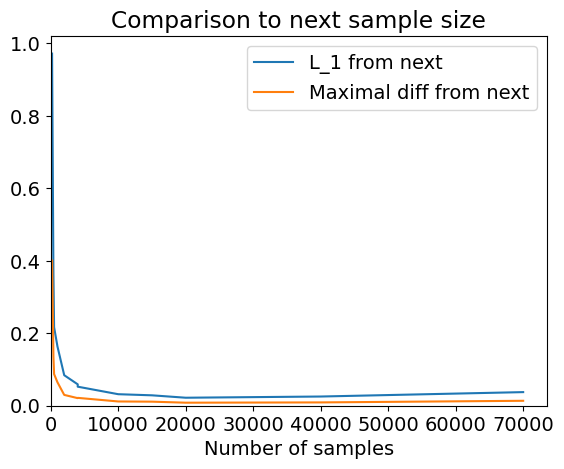

In [133]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure() 
plt.figure().clear()
plt.rcParams.update({'font.size': 14})
plt.plot([i[0] for i in plotter], [i[2] for i in plotter], label="L_1 from next")
plt.plot([i[0] for i in plotter], [i[3] for i in plotter], label="Maximal diff from next")

plt.title("Comparison to next sample size")
plt.xlabel("Number of samples")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.savefig("comparison_to_next.png")
plt.show()

<Figure size 640x480 with 0 Axes>

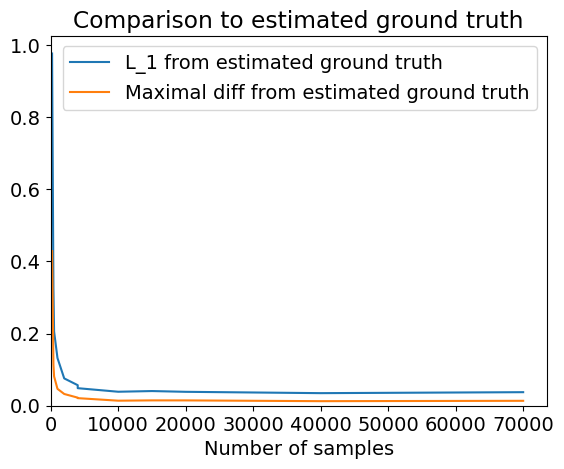

In [134]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure() 
plt.figure().clear()
plt.rcParams.update({'font.size': 14})
plt.plot([i[0] for i in plotter], [i[4] for i in plotter], label="L_1 from estimated ground truth")
plt.plot([i[0] for i in plotter], [i[5] for i in plotter], label="Maximal diff from estimated ground truth")

plt.title("Comparison to estimated ground truth")
plt.xlabel("Number of samples")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.savefig("comparison_to_estimated_ground_truth.png")
plt.show()

In [135]:
maximal_diff_per_size = []
for i in plotter:
    maximal_diff_per_size.append((i[0], i[3]))

In [136]:
maximal_diff_per_size

[(200, 0.4007790985373796),
 (400, 0.1355289686150481),
 (500, 0.08723916090757729),
 (1000, 0.06462128951618654),
 (2000, 0.029871511847803046),
 (4000, 0.02090148503940105),
 (4000, 0.02169679718526591),
 (10000, 0.011743911884815989),
 (15000, 0.011207800853162243),
 (20000, 0.008353137319831224),
 (40000, 0.009135011765837482),
 (70000, 0.013628596720045658)]

In [137]:
values_sorted = sorted(list(np.abs(np.array(shaps_100k)).flatten()))

In [138]:
def count_over(list_to_count, threshold):
    filtered = [i for i in list_to_count if i > threshold]
    return len(filtered)/len(list_to_count)

In [140]:
maximal_diffs = []
for i in maximal_diff_per_size:
    val = count_over(values_sorted, i[1])
    maximal_diffs.append((i[0], val))

In [144]:
maximal_diffs = maximal_diffs[:-1]

<Figure size 640x480 with 0 Axes>

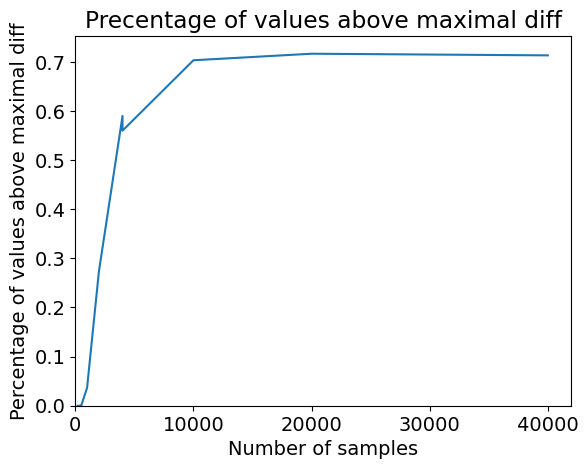

In [145]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure() 
plt.figure().clear()
plt.rcParams.update({'font.size': 14})
plt.plot([i[0] for i in maximal_diffs], [i[1] for i in maximal_diffs])
plt.title("Precentage of values above maximal diff")
plt.xlabel("Number of samples")
plt.ylabel("Percentage of values above maximal diff")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.savefig("percentage_over_maximal_diff.png")
plt.show()

In [102]:
shaps = maximum_likelihood_calculator_d_1.calculate_shapley_values(100000)
print(shaps)

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
100000
[array([[ 0.06302366,  0.        ,  0.01148658,  0.02770227,  0.06481287,
         0.06337965,  0.06175805,  0.03342435,  0.05260904, -0.03837425,
         0.        ,  0.02936597,  0.        ,  0.0594499 ,  0.06375555,
         0.05402944,  0.        ,  0.        ,  0.01285214,  0.0621946 ,
         0.064344  ,  0.06272761,  0.06278331,  0.01479496,  0.        ,
         0.01257241,  0.01245446,  0.        ,  0.01505305,  0.0640551 ,
         0.        ,  0.        ,  0.01245234, -0.03975835,  0.        ,
        -0.0403547 ,  0.02910855,  0.        ,  0.        , -0.03454675,
         0.02955353,  0.        , -0.03955318, -0.04087793,  0.03070216,
        -0.04112821,  0.0322668 , -0.03975894, -0.04143253,  0.        ,
         0.        , -0.04008654, -0.04126455,  0.        , -0.04024024,
         0.        ,  0.        ,  0.        ,  0.0176909 ,  0.        ,
         0.01150862, -0.03302625,  0.        ,  0.        ,  0.        ,
        -0.04049893,  0.        , -0.0249

In [107]:
calculate_highest_distance_matrices(shaps_20k, shaps_40k)

0.008353137319831224

In [105]:
shaps_100k  = shaps

In [108]:
shaps_70k = maximum_likelihood_calculator_d_1.calculate_shapley_values(70000)
print(shaps_70k)

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
70000
[array([[ 0.06150616,  0.        ,  0.00931376,  0.0264708 ,  0.06309869,
         0.06408815,  0.06198151,  0.03244847,  0.04981084, -0.03830686,
         0.0078261 ,  0.02974496,  0.        ,  0.05787786,  0.06444721,
         0.0539454 , -0.00877071,  0.        ,  0.01400362,  0.06326047,
         0.06346487,  0.0625498 ,  0.06219541,  0.01453886,  0.        ,
         0.01050281,  0.01208323,  0.01281441,  0.01483719,  0.06259311,
         0.        ,  0.        ,  0.01145788, -0.04179356,  0.        ,
        -0.04195012,  0.02704551,  0.        ,  0.        , -0.03335486,
         0.02804066,  0.        , -0.04030209, -0.04180659,  0.03355316,
        -0.04139862,  0.03367587, -0.04077032, -0.04021548,  0.        ,
         0.00932406, -0.04197276, -0.0401114 ,  0.        , -0.03921464,
         0.        ,  0.        ,  0.        ,  0.01385115,  0.        ,
         0.01148862, -0.03543518,  0.        ,  0.        ,  0.        ,
        -0.04043668,  0.        , -0.02406

In [109]:
for size in [500,2000,4000,10000,15000]:
    shaps = maximum_likelihood_calculator_d_1.calculate_shapley_values(size)
    results.append((size, shaps))

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
500
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
2000
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
4000
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
10000
1


  0%|          | 0/1 [00:00<?, ?it/s]

1
15000


In [112]:
results.append((100000, shaps_100k))

In [113]:
results.append((70000, shaps_70k))

In [117]:
results = sorted(results, key=lambda a: a[0])

In [118]:
results

[(10,
  [array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.09571429,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        , -0.04285714,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        , -0.02285714,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
      

In [147]:
[i[0] for i in results]

[10,
 20,
 50,
 100,
 200,
 400,
 500,
 1000,
 2000,
 4000,
 4000,
 10000,
 15000,
 20000,
 40000,
 70000,
 100000]